In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [8]:
df = pd.read_csv("Diwali Sales Data.csv" , encoding = 'unicode_escape')

In [5]:
df.shape

(11251, 15)

In [7]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [11]:
df.drop(['Status','unnamed1'], axis = 1, inplace = True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [15]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [17]:
df.shape

(11251, 13)

In [19]:
df.dropna(inplace = True)

In [21]:
df.shape

(11239, 13)

In [23]:
df['Amount'] = df['Amount'].astype('int') 

In [25]:
df['Amount'].dtypes

dtype('int32')

In [29]:
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


GENDER

In [31]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

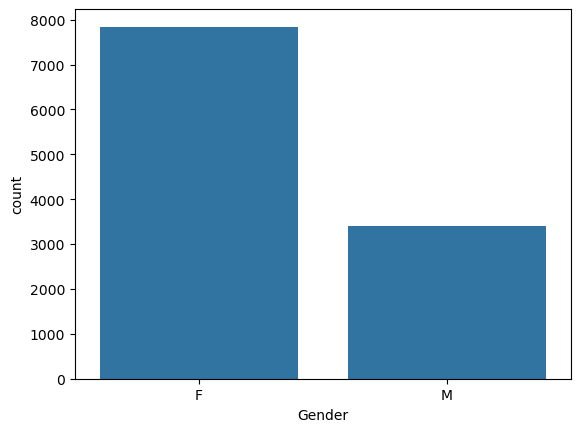

In [12]:
sns.countplot(x = 'Gender' , data = df)
plt.show()

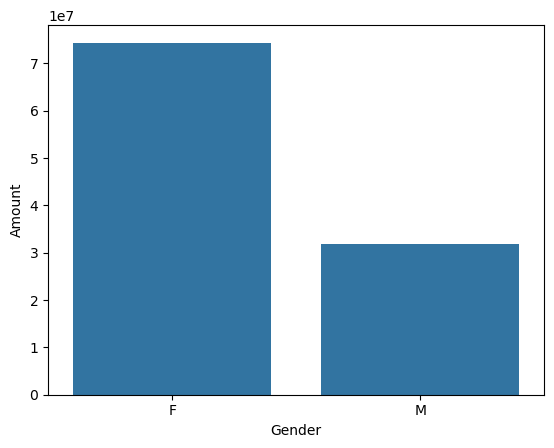

In [16]:
sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.barplot(x = 'Gender', y = 'Amount', data=sales_gen)
plt.show()

From above graphs we can see that females shop more than men and also spend more money on shopping than men.
Hence females are mostly the buyers and have more purchasing power than men.

AGE

In [47]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

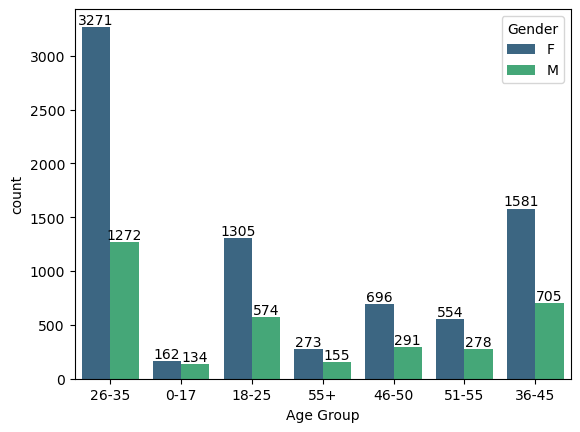

In [20]:
ax = sns.countplot(x = 'Age Group' ,hue = 'Gender', data = df,palette = 'viridis')

for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

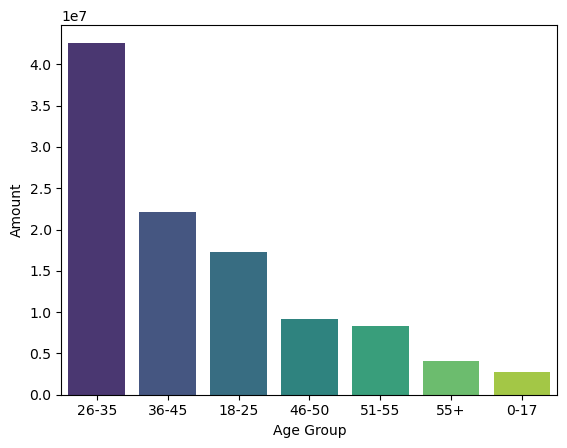

In [26]:
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.barplot(x = 'Age Group', y = 'Amount',hue = 'Age Group', legend = False, data=sales_age,palette = 'viridis')
plt.show()

From the above two charts we can see that maximum buyers are females of age group 26-35 years.

STATE

In [61]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

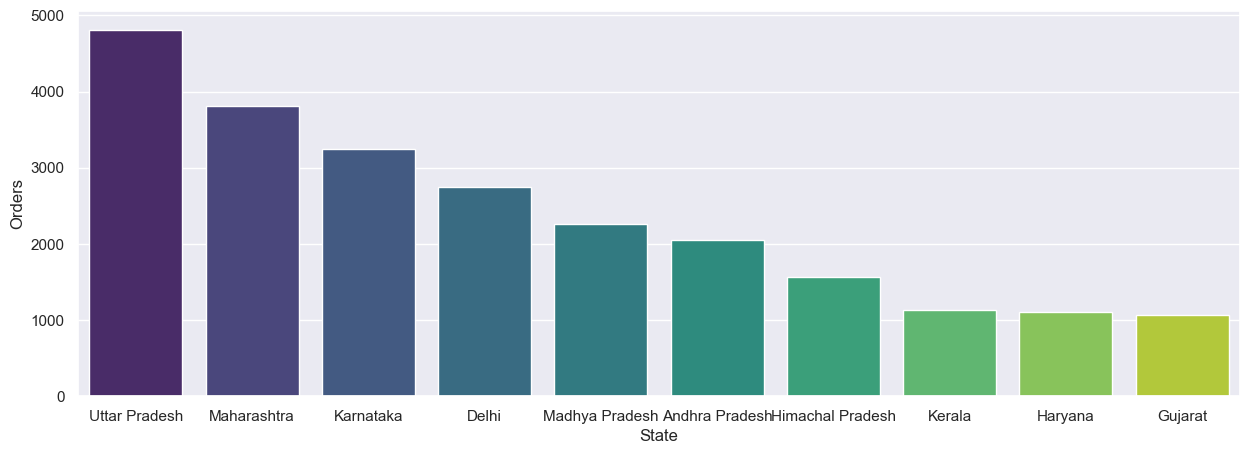

In [28]:
sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x = 'State', y = 'Orders', data=sales_state, legend = False,hue = 'State',palette = 'viridis' )
plt.show()

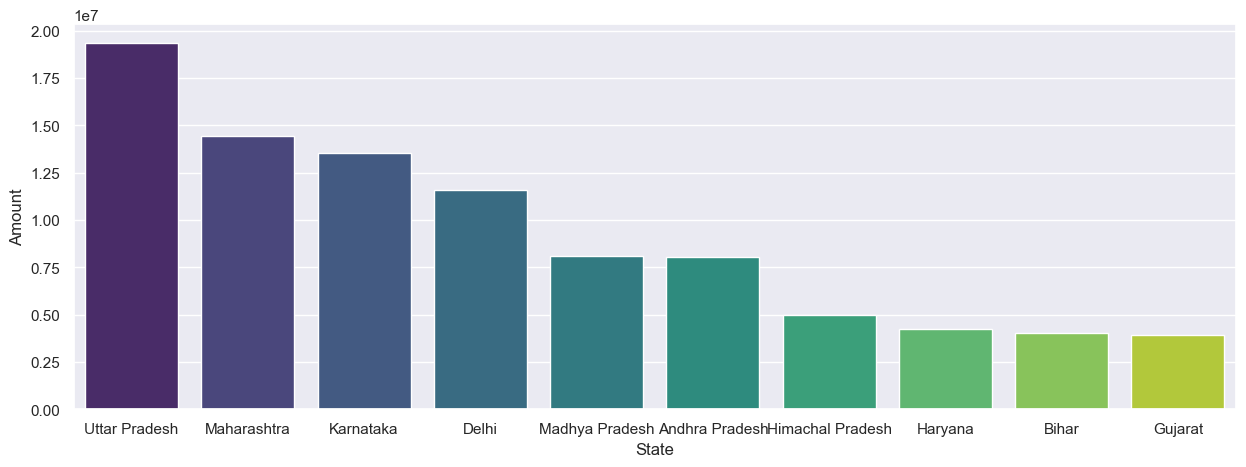

In [30]:
sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x = 'State', y = 'Amount', data=sales_state,legend = False,hue = 'State',palette = 'viridis')
plt.show()

From the above graphs we can see that most of the order and total sales are from Uttar Pradesh, Maharashtra and Karnataka respectively.

MARITAL_STATUS

In [71]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

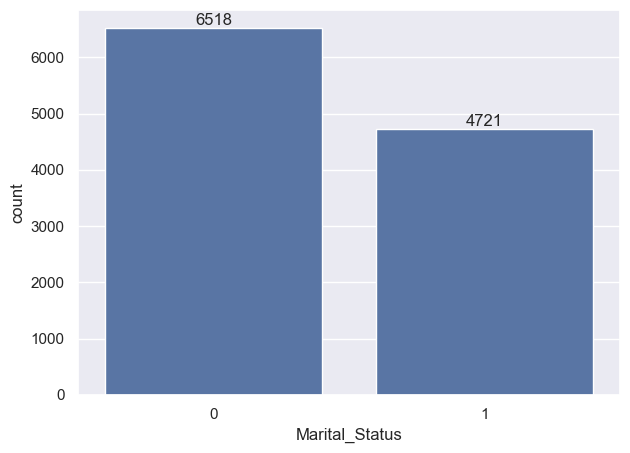

In [87]:

sns.set(rc={'figure.figsize':(7,5)})
ax = sns.countplot(x = 'Marital_Status' , data = df)

for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

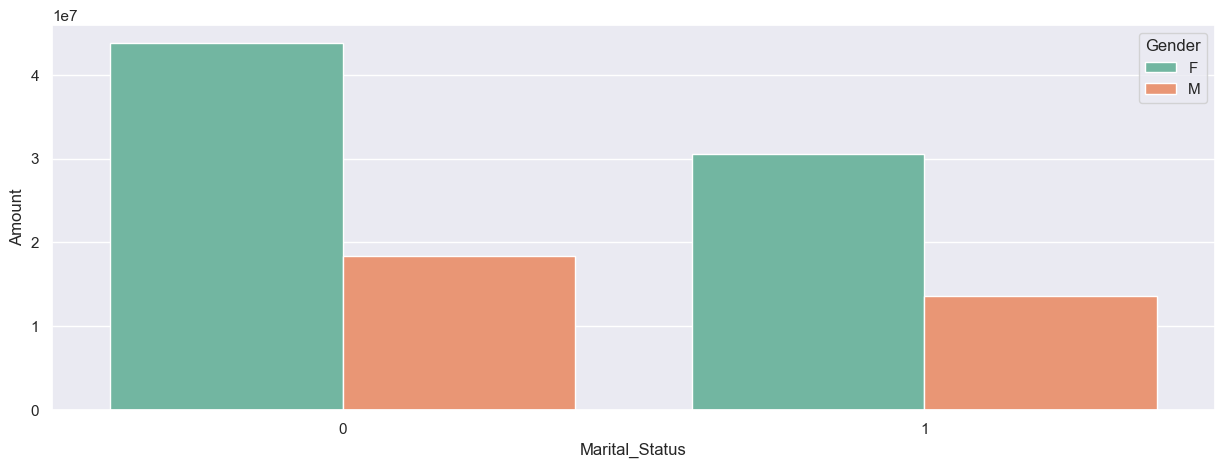

In [34]:
sales_m_s = df.groupby(['Marital_Status','Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.barplot(x = 'Marital_Status', y = 'Amount', data=sales_m_s, hue = 'Gender', palette = 'Set2')
plt.show()

From the above graphs we can see that the highest buyers and people with the most purchasing power are married women.

OCCUPATION

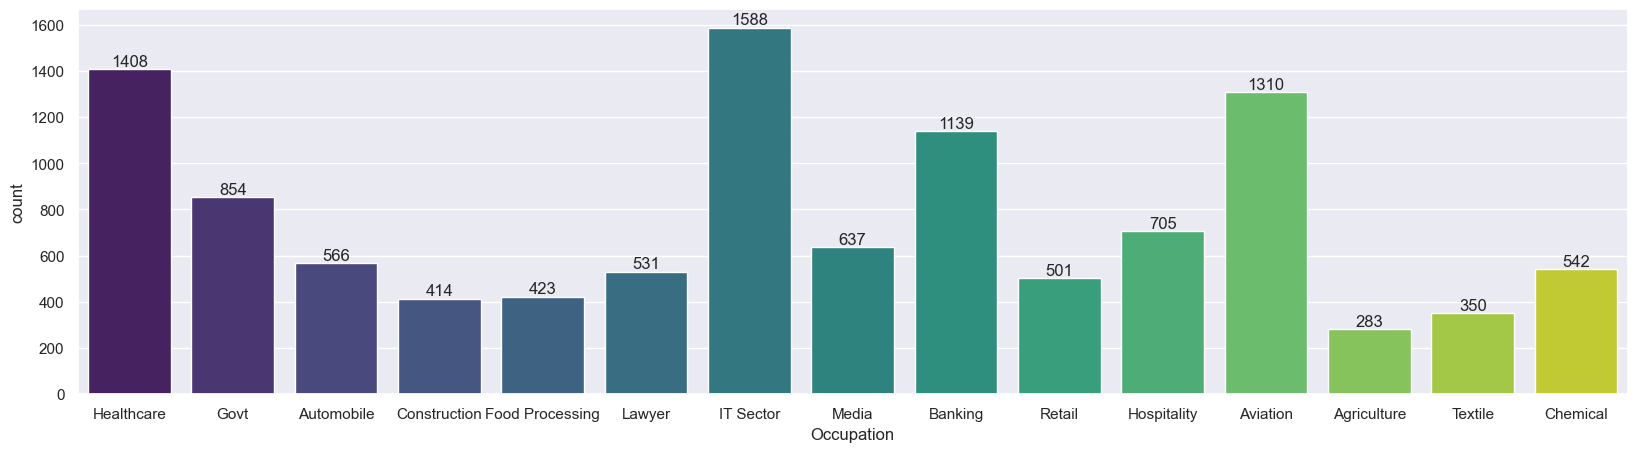

In [36]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(x = 'Occupation' , data = df,legend = False,hue = 'Occupation',palette = 'viridis')

for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

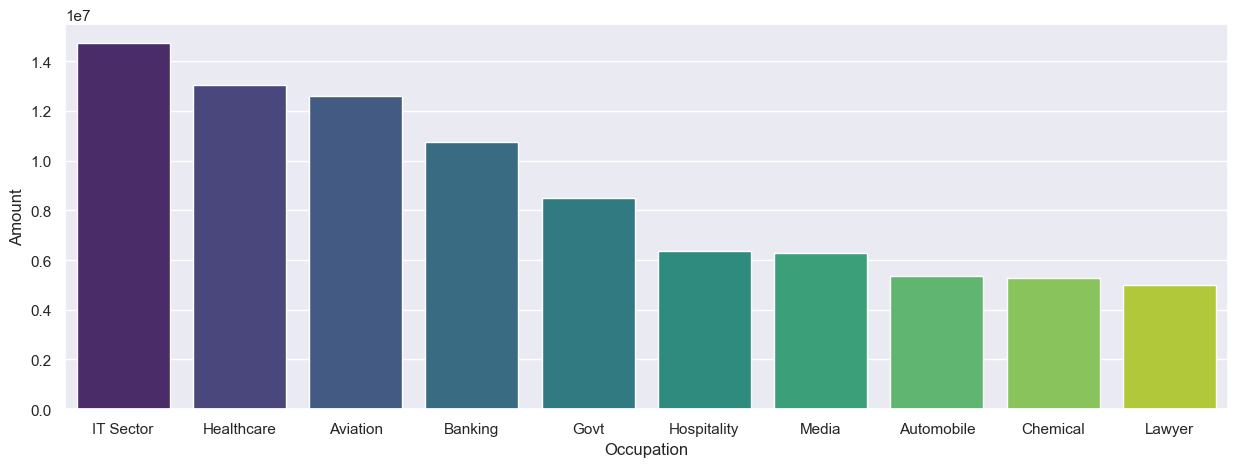

In [38]:
sales_occupation = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x = 'Occupation', y = 'Amount', data=sales_occupation,legend = False,hue = 'Occupation',palette = 'viridis')
plt.show()

From the above graphs we can see that most of the buyers work in IT sector, Healthcare and Aviation.

In [ ]:
Product Category

In [99]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

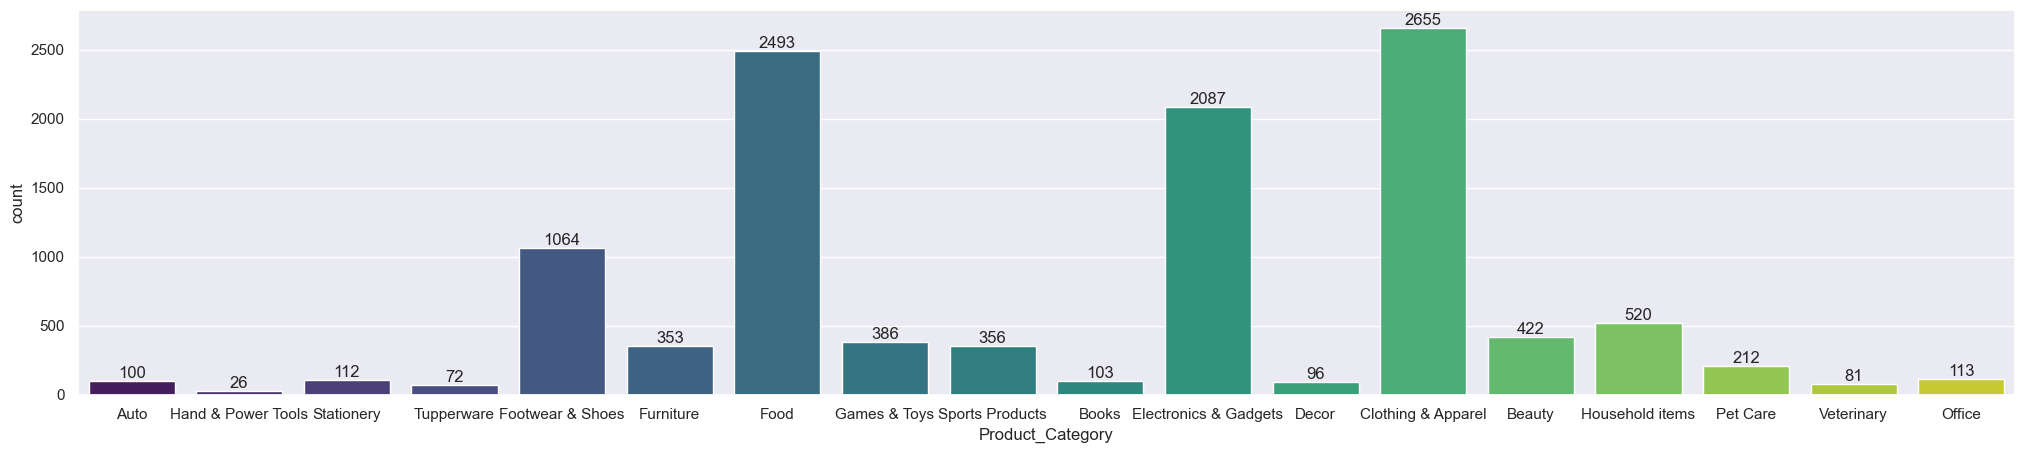

In [42]:
sns.set(rc={'figure.figsize':(25,5)})
ax = sns.countplot(x = 'Product_Category' , data = df,legend = False,hue = 'Product_Category',palette = 'viridis')

for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

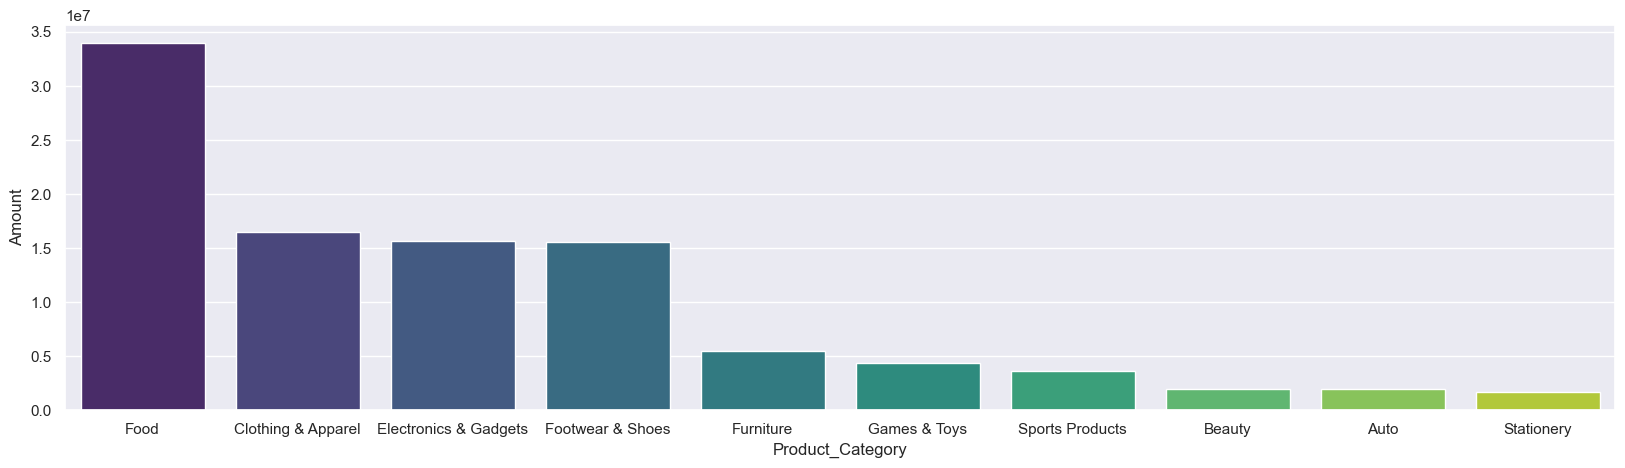

In [44]:
sales_product = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x = 'Product_Category', y = 'Amount', data=sales_product,legend = False,hue = 'Product_Category',palette = 'viridis')
plt.show()

From the above graphs we can see that most of the sold products are from Food,Clothing and Electronics category

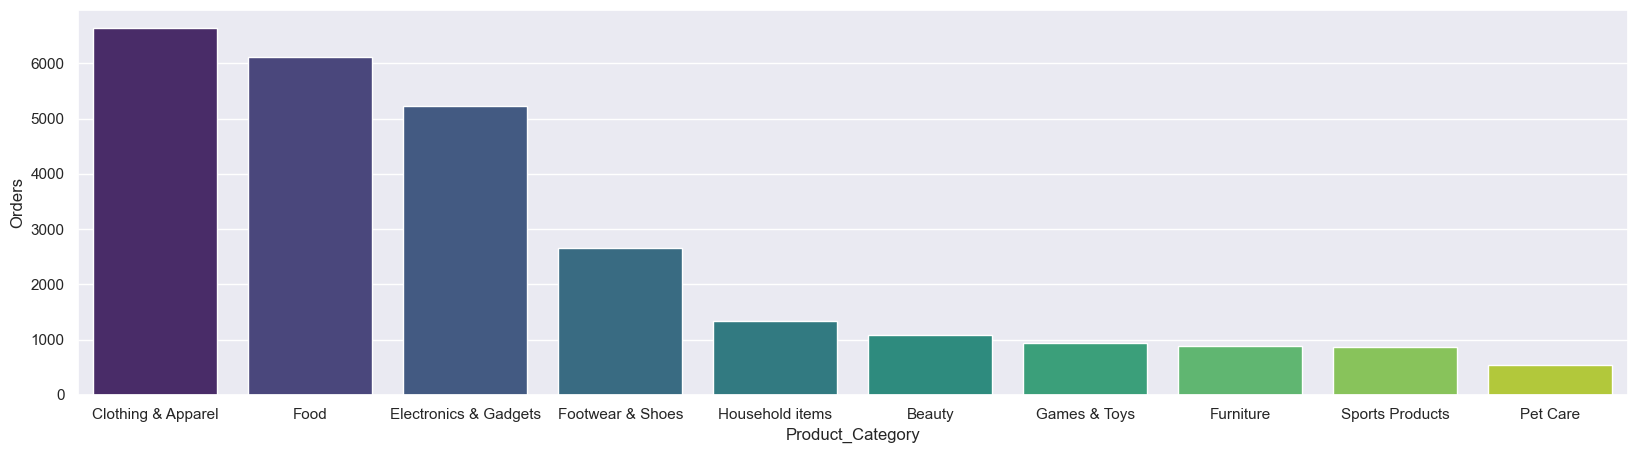

In [46]:
sales_product = df.groupby(['Product_Category'], as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x = 'Product_Category', y = 'Orders', data=sales_product,legend = False,hue = 'Product_Category',palette = 'viridis')
plt.show()

CONCLUSION

From the above chart analysis we can conclude that married women(females) of age group 26-35 years, from UP, Maharashtra and Karnataka, working in IT, Healthcare, Aviation sector are most likely to buy products from Food, Clothing and Electronics category